In [38]:
import spikeinterface.full as si
#import spikeinterface.core as si
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spiketoolkit
import spikeinterface.widgets as sw
import numpy as np
import numpy as np
import spikeinterface
import zarr as zr
import os
from  pathlib import Path
import tqdm
import spikeinterface.full as si
from spikeinterface.sortingcomponents.peak_detection import detect_peaks
from probeinterface import Probe, ProbeGroup
import matplotlib.pyplot as plt
import pickle
sr=30e3

In [39]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240806_SESSION_00/'

In [41]:
neural_data = np.load(path+'/neural_data.npy', allow_pickle=True)

In [18]:
tt_path = path+'headstage_0/tt.pkl'
with open(tt_path, 'rb') as file:
    tt = pickle.load(file)

In [19]:
#triggers = [x/sr for x in tt['triggers']]
triggers = [x for x in tt['triggers']]

In [25]:
sig = neural_data[22:24]

In [26]:
full_raw_rec = se.NumpyRecording(traces_list=np.transpose(sig), sampling_frequency=sr)
recording_notch = si.notch_filter(full_raw_rec, freq=50)
#raw_rec = full_raw_rec.set_probe(probe)
#raw_rec = raw_rec.remove_channels(["CH2"])
recording_cmr = si.common_reference(recording_notch, reference='global', operator='median')
recording_f = si.bandpass_filter(full_raw_rec, freq_min=300, freq_max=9000)

In [27]:
filtered_sig = recording_f.get_traces()

In [28]:
c23 = filtered_sig[:, 1]

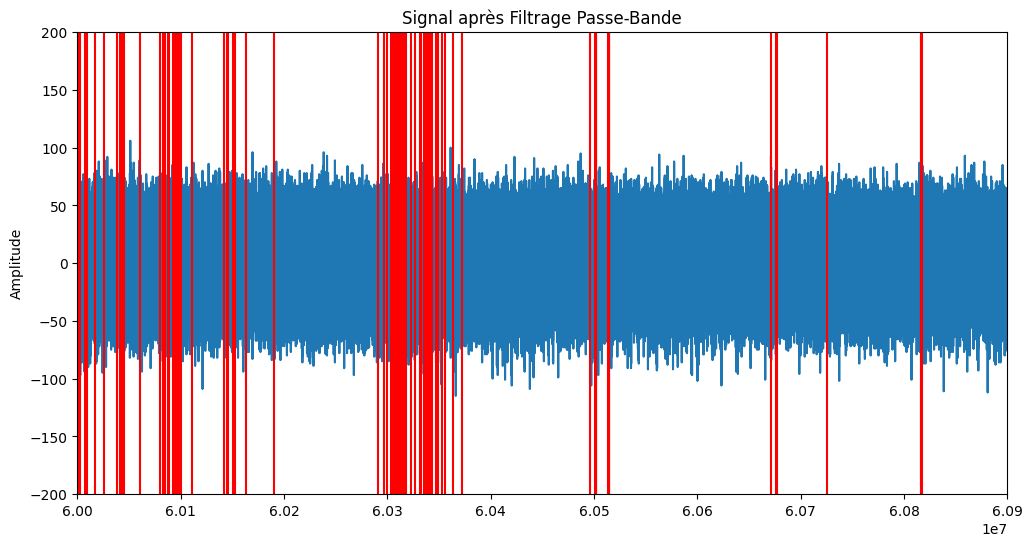

In [37]:
plt.figure(figsize=(12, 6))

# Tracer une partie du signal filtré
time_plot = np.arange(len(c23))
plt.plot(time_plot, filtered_sig[:, 0], label='Signal Filtré (300-9000 Hz)')
for line_time in triggers:
    plt.axvline(x=line_time, color='r', linestyle='-')
plt.ylabel('Amplitude')
plt.xlim(sr*2000, sr*2030)  # Limiter l'axe x de 0 à 60 secondes
plt.ylim(-200, 200)
plt.title('Signal après Filtrage Passe-Bande')
plt.savefig(path+'filtered_neural.png')